In [14]:
#packages for data analysis
import numpy as np
import pandas as pd

from sklearn import svm

#visual your data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)
%matplotlib inline 

In [15]:
# recipes = pd.read_csv('/content/cupcakeVSmuffin.csv')
# print(recipes.head())
recipes = pd.read_csv('cupcakeVSmuffin.csv')
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg   Baking Powder  Vanilla  Salt
0  Muffin     55    28     10       5   13               9        3     2
1  Muffin     47    24      9       6   16               5        5     5
2  Muffin     47    25      8       8   15               4        7     7
3  Muffin     45    22      7      14   23              14        4     6
4  Muffin     50    24      2      15   21              16        6     0


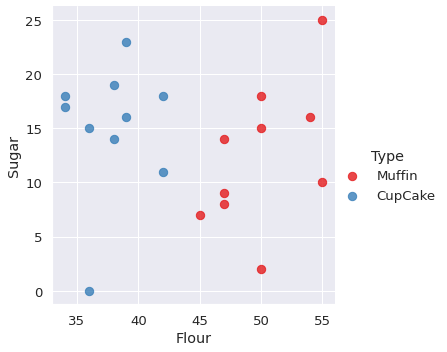

In [16]:
# plot our data
#seaborn.lmplot() method is used to draw a scatter plot onto a FacetGrid
sns.lmplot(x='Flour',y='Sugar', data=recipes, hue='Type', palette = 'Set1',fit_reg=False, scatter_kws={"s":70});

In [17]:
#format or pre-process our data
type_label = np.where(recipes['Type'] == 'Muffin',0,1)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features
ingredients = recipes[['Flour','Sugar']].values
print(ingredients)

[[55 10]
 [47  9]
 [47  8]
 [45  7]
 [50  2]
 [55 25]
 [54 16]
 [47 14]
 [50 18]
 [50 15]
 [39 23]
 [34 17]
 [39 16]
 [38 19]
 [42 18]
 [36 15]
 [38 14]
 [36  0]
 [34 18]
 [42 11]]


In [18]:
#fit model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [19]:
#get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]
print(yy)

#plot the paralllels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

[-38.28464835 -36.14025772 -33.99586708 -31.85147645 -29.70708582
 -27.56269519 -25.41830455 -23.27391392 -21.12952329 -18.98513266
 -16.84074202 -14.69635139 -12.55196076 -10.40757013  -8.26317949
  -6.11878886  -3.97439823  -1.83000759   0.31438304   2.45877367
   4.6031643    6.74755494   8.89194557  11.0363362   13.18072683
  15.32511747  17.4695081   19.61389873  21.75828936  23.90268
  26.04707063  28.19146126  30.33585189  32.48024253  34.62463316
  36.76902379  38.91341443  41.05780506  43.20219569  45.34658632
  47.49097696  49.63536759  51.77975822  53.92414885  56.06853949
  58.21293012  60.35732075  62.50171138  64.64610202  66.79049265]


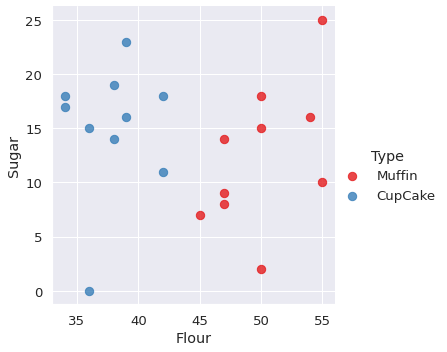

In [20]:
sns.lmplot(x='Flour',y='Sugar', data=recipes, hue='Type', palette = 'Set1',fit_reg=False, scatter_kws={"s":70});

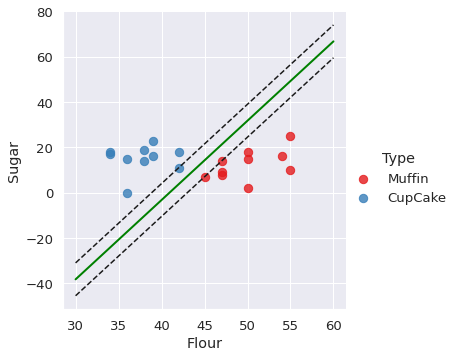

In [21]:
sns.lmplot(x='Flour',y='Sugar', data=recipes, hue='Type', palette = 'Set1',fit_reg=False, scatter_kws={"s":70});
plt.plot(xx,yy,linewidth=2,color='green')
plt.plot(xx,yy_down, 'k--')
plt.plot(xx,yy_up,'k--')

In [22]:
# create a function  to predicate muffin or cupcake
def muffin_or_cupcake(flour,sugar) :
  if(model.predict([[flour,sugar]])) == 0 :
    print("You're looking at muffin recipe. ")
  else :
    print("You are looking at cupcake recipe. ")


#predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50,20)

You're looking at muffin recipe. 


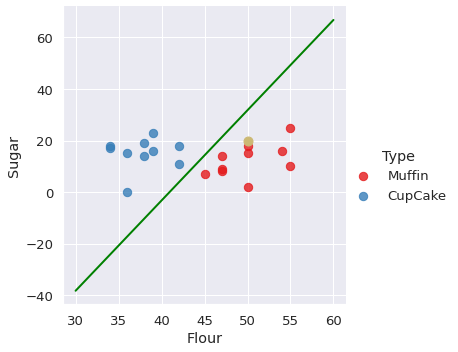

In [25]:
sns.lmplot(x='Flour',y ='Sugar', data= recipes, hue='Type', palette = 'Set1', fit_reg = False, scatter_kws={"s":70})
plt.plot(xx,yy,linewidth = 2, color = 'green')
plt.plot(50,20,'yo',markersize = '9')